# EDA On Essays and Answers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

Import pandas for data manipulation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/datasets/ASAP2_train_sourcetexts.csv")
df.head()

,essay_id,score,full_text,assignment,prompt_name,economically_disadvantaged,student_disability_status,ell_status,race_ethnicity,gender,source_text_1,source_text_2,source_text_3,source_text_4
0,AAAVUP14319000159574,4,The author suggests that studying Venus is wor...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,Black/African American,F,"The Challenge of Exploring Venus\nVenus, somet...",NaN,NaN,NaN
1,AAAVUP14319000159542,2,NASA is fighting to be alble to to go to Venus...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Not economically disadvantaged,Not identified as having disability,No,Hispanic/Latino,F,"The Challenge of Exploring Venus\nVenus, somet...",NaN,NaN,NaN
2,AAAVUP14319000159461,3,"""The Evening Star"", is one of the brightest po...","In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,White,M,"The Challenge of Exploring Venus\nVenus, somet...",NaN,NaN,NaN
3,AAAVUP14319000159420,2,The author supports this idea because from rea...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Not identified as having disability,Yes,Hispanic/Latino,F,"The Challenge of Exploring Venus\nVenus, somet...",NaN,NaN,NaN
4,AAAVUP14319000159419,2,How the author supports this idea is that he s...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Not identified as having disability,Yes,Hispanic/Latino,M,"The Challenge of Exploring Venus\nVenus, somet...",NaN,NaN,NaN


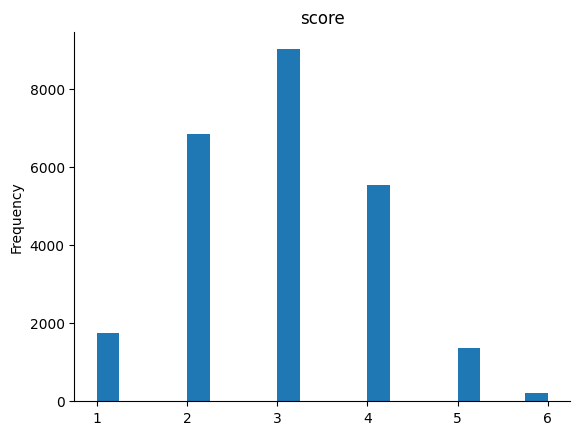

In [5]:
df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

Load the dataset into the notebook using pandas.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24728 entries, 0 to 24727
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   essay_id                    24728 non-null  object
 1   score                       24728 non-null  int64 
 2   full_text                   24728 non-null  object
 3   assignment                  24728 non-null  object
 4   prompt_name                 24728 non-null  object
 5   economically_disadvantaged  20723 non-null  object
 6   student_disability_status   20723 non-null  object
 7   ell_status                  24286 non-null  object
 8   race_ethnicity              24724 non-null  object
 9   gender                      24728 non-null  object
 10  source_text_1               24728 non-null  object
 11  source_text_2               4005 non-null   object
 12  source_text_3               4005 non-null   object
 13  source_text_4               1959 non-null   ob

Did the df.info() to get the summary of the columns, the null values present and the datatypes of the columns. The dataset has 14 columns with most of the columns having string values while only the score column has integer values.

In [8]:
df.isna().sum()

,0
essay_id,0
score,0
full_text,0
assignment,0
prompt_name,0
economically_disadvantaged,4005
student_disability_status,4005
ell_status,442
race_ethnicity,4
gender,0


In [7]:
df.drop(["source_text_2", "source_text_3", "source_text_4"], axis=1, inplace=True)

In [9]:
df.head()

,essay_id,score,full_text,assignment,prompt_name,economically_disadvantaged,student_disability_status,ell_status,race_ethnicity,gender,source_text_1
0,AAAVUP14319000159574,4,The author suggests that studying Venus is wor...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,Black/African American,F,"The Challenge of Exploring Venus\nVenus, somet..."
1,AAAVUP14319000159542,2,NASA is fighting to be alble to to go to Venus...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Not economically disadvantaged,Not identified as having disability,No,Hispanic/Latino,F,"The Challenge of Exploring Venus\nVenus, somet..."
2,AAAVUP14319000159461,3,"""The Evening Star"", is one of the brightest po...","In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,White,M,"The Challenge of Exploring Venus\nVenus, somet..."
3,AAAVUP14319000159420,2,The author supports this idea because from rea...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Not identified as having disability,Yes,Hispanic/Latino,F,"The Challenge of Exploring Venus\nVenus, somet..."
4,AAAVUP14319000159419,2,How the author supports this idea is that he s...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Not identified as having disability,Yes,Hispanic/Latino,M,"The Challenge of Exploring Venus\nVenus, somet..."


Get the sum of the null values present in each of the columns. Only 7 columns had null values.

In [10]:
df["score"].value_counts(normalize=True)*100

,proportion
score,
3,36.480912
2,27.689259
4,22.456325
1,7.081042
5,5.483662
6,0.808800


Got the distributions of the scores. 36% got 3 and since the hidghest score  was 6, most of the students had an average mark. Only 0.8% got a mark of 6 and 5.4% got a mark of 5, showing that not many students got high marks.

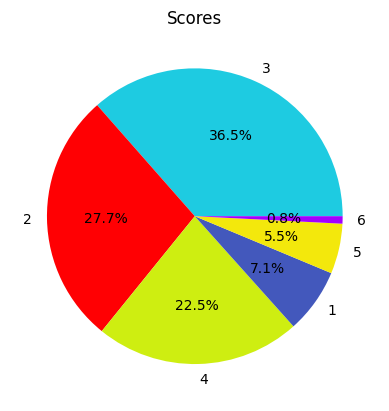

In [11]:
labels = ["3", "2", "4", "1", "5", "6"]
sizes = df["score"].value_counts(normalize=True)*100
colors =["#1ecbe1", "#ff0003", "#ceee11", "#4358bc", "#f3e80c", "#a200ff"]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors)

plt.title("Scores")
plt.show()

In [12]:
df["prompt_name"].value_counts(normalize=True)*100

,proportion
prompt_name,
Driverless cars,24.951472
Facial action coding system,19.746846
Exploring Venus,18.117114
The Face on Mars,12.192656
"""A Cowboy Who Rode the Waves""",8.795697
Does the electoral college work?,8.274021
Car-free cities,7.922193


This was to get the distribution of topics that the students wrote essays about. Most of the essays were on driverless cars with the distribution being 24% and the least being car-free cities with 7%.

In [14]:
df["economically_disadvantaged"].value_counts(normalize=True)*100

,proportion
economically_disadvantaged,
Economically disadvantaged,61.699561
Not economically disadvantaged,38.300439


Most of the students were economically disadvantaged.

In [15]:
df["student_disability_status"].value_counts(normalize=True)*100

,proportion
student_disability_status,
Not identified as having disability,85.634319
Identified as having disability,14.365681


Most of the students did not identify as having a disability

In [16]:
 df["ell_status"].value_counts(normalize=True)*100

,proportion
ell_status,
No,86.510747
Yes,13.489253


Ell status means people who are english language learners, so most of the students were already proficient in english and only 13% were learners.

In [17]:
df["race_ethnicity"].unique()

array(['Black/African American', 'Hispanic/Latino', 'White',
       'Two or more races/Other', 'Asian/Pacific Islander',
       'American Indian/Alaskan Native', nan], dtype=object)

DId this to get the unique values in the race/enthnicity column. There are 6 identified races/ethnicities and some which were not identified and were recorded as null values.

In [18]:
df["race_ethnicity"].value_counts(normalize=True)*100

,proportion
race_ethnicity,
White,39.908591
Hispanic/Latino,29.052742
Black/African American,18.556868
Two or more races/Other,6.168096
Asian/Pacific Islander,5.731273
American Indian/Alaskan Native,0.582430


Most of the students were White with 39% while only 0.5% were American Indian/Alaskan Native. Majority of the student population was made up of White, Hispanic/Latino and Black/African American students while the minority of the population was made up of Two or more races, Asian/Pacific Islander and American Indian/ Alaskan Native.

In [19]:
df["gender"].value_counts(normalize=True)*100

,proportion
gender,
M,50.614688
F,49.385312


The distribution of the genders was somehow balanced with males being 50.6% and females being 49.3%.

In [20]:
df.groupby("score")["prompt_name"].value_counts(normalize=True)*100

score  prompt_name                     
1      Exploring Venus                     32.381496
       The Face on Mars                    14.448886
       Facial action coding system         12.564249
       "A Cowboy Who Rode the Waves"       12.450029
       Does the electoral college work?    10.908053
       Driverless cars                      9.308966
       Car-free cities                      7.938321
2      Exploring Venus                     20.724405
       Driverless cars                     18.679714
       Facial action coding system         18.299985
       The Face on Mars                    15.452023
       "A Cowboy Who Rode the Waves"       13.334307
       Does the electoral college work?     7.492332
       Car-free cities                      6.017234
3      Driverless cars                     26.105753
       Facial action coding system         21.117393
       Exploring Venus                     16.284226
       The Face on Mars                    12.082918
       "A Cowboy Who Rode the Waves"        9.167498
       Car-free cities                      7.770757
       Does the electoral college work?     7.471455
4      Driverless cars                     34.521880
       Facial action coding system         20.169278
       Exploring Venus                     14.550693
       Car-free cities                      9.706465
       The Face on Mars                     8.950117
       Does the electoral college work?     8.391860
       "A Cowboy Who Rode the Waves"        3.709706
5      Driverless cars                     32.079646
       Facial action coding system         22.492625
       Exploring Venus                     12.905605
       Does the electoral college work?    12.536873
       Car-free cities                     11.799410
       The Face on Mars                     7.374631
       "A Cowboy Who Rode the Waves"        0.811209
6      Facial action coding system         40.000000
       Exploring Venus                     21.000000
       Does the electoral college work?    16.000000
       Driverless cars                     10.500000
       The Face on Mars                     8.500000
       Car-free cities                      4.000000
Name: proportion, dtype: float64

For the essays that got a mark of 1, most of the essays were those of exploring venus whith 32%, while driverless cars and car free cities got 9% and 7% respectively, which shows that essays of exploring venus were harder to write and most students didn't perform well in them as compared to the driverless cars and car free cities essays which had a very low percentage of students who scored 1.

For the essays that got a score of 2, exploring venus was the highest with a distribution of 20% while the lowest was car free cities with a distribution of 6%

For the essays that got a score of 3, driverless cars had a distribution of 26% showing that most of the essays for this topic scored averagely, while car free cities and does the electoral college work had a distribution of 7.7% and 7.4% respectively.

For the essays that scored 4, driverless cars had the highst distribution with 34%, while a cow boy who rode the waves had the lowest with 3.7%

For the essays that scored 5, driverless cars had the highest distribution with 32%, while a cowboy who rode the waves had the lowest with 0.8%

For the essays that scored 6, facial action coding system had the highest distribution with 40%, while car free cities had the lowest with 4%

In general, essays regarding driverless cars performed better since they had the highest distributions in the 3, 4 and 5 scores.

In [22]:
df.groupby("prompt_name")["score"].value_counts(normalize=True)*100

prompt_name                       score
"A Cowboy Who Rode the Waves"     2        41.977011
                                  3        38.022989
                                  1        10.022989
                                  4         9.471264
                                  5         0.505747
Car-free cities                   3        35.783563
                                  4        27.514038
                                  2        21.031138
                                  5         8.167432
                                  1         7.095457
                                  6         0.408372
Does the electoral college work?  3        32.942326
                                  2        25.073314
                                  4        22.776149
                                  1         9.335288
                                  5         8.308895
                                  6         1.564027
Driverless cars                   3        38.168558
                                  4        31.069692
                                  2        20.729335
                                  5         7.050243
                                  1         2.641815
                                  6         0.340357
Exploring Venus                   3        32.790179
                                  2        31.674107
                                  4        18.035714
                                  1        12.656250
                                  5         3.906250
                                  6         0.937500
Facial action coding system       3        39.012902
                                  2        25.660455
                                  4        22.936719
                                  5         6.246160
                                  1         4.505427
                                  6         1.638337
The Face on Mars                  3        36.152570
                                  2        35.091211
                                  4        16.484245
                                  1         8.391376
                                  5         3.316750
                                  6         0.563847
Name: proportion, dtype: float64

For the essay a cow boy who rode the waves, most of the students(41%) got a score of 2, while only 0.5% got 5. No student got 6. This shows that most of the students scored below average.

For the essay car free cities, most of the students got 3 - 35% and 4 - 27% while only 0.4% got 6. Most of the students were above average.

For the essay does the electoral collage work?, most of the students(32.9%) got 3 followed by 25% who scored 2. 1.5% of the students who did this essay got 6.

For the essay driverless cars, 38% got 3 followed by 31% who got 4. Only 0.3% got 6.

For the essay exploring venus, 32% got 3 closely followed by31% who got 2. 0.9% got 6.

For the essay facial action coding system, 39% got 3 followed by 25% who got 2 and 1.6% got 6.

For the essay the face on mars, 36% got 3 followed by 35% who got 2 and only 0.5% got 6.

For most of the essays the highest percentage of students got a score of 3 showing that most of the essays had an average performance.

The essay with the highest percentage of students scoring a 6 is facial action coding system with 1.6% followed by does the electoral collage work with 1.5%

In [23]:
df.groupby("score")["economically_disadvantaged"].value_counts(normalize=True)*100

score  economically_disadvantaged    
1      Economically disadvantaged        73.821253
       Not economically disadvantaged    26.178747
2      Economically disadvantaged        68.676123
       Not economically disadvantaged    31.323877
3      Economically disadvantaged        62.202459
       Not economically disadvantaged    37.797541
4      Economically disadvantaged        55.079156
       Not economically disadvantaged    44.920844
5      Not economically disadvantaged    63.645224
       Economically disadvantaged        36.354776
6      Not economically disadvantaged    77.500000
       Economically disadvantaged        22.500000
Name: proportion, dtype: float64

This just shows the percentages of students who are either economically disadvantaged or not with regards to the scores. For scores 1-4, the higher percentage of students were economically disadvantaged while for scores 5 and 6, a higher percentage of students are not economically disadvantaged.

This goes to show that the students who got a higher score were able to get better materials to write their essays with since they are not economically disadvantaged.

In [24]:
df.groupby("economically_disadvantaged")["score"].value_counts(normalize=True)*100

economically_disadvantaged      score
Economically disadvantaged      3        37.196934
                                2        31.808228
                                4        19.591741
                                1         8.204286
                                5         2.917253
                                6         0.281558
Not economically disadvantaged  3        36.411742
                                4        25.740204
                                2        23.371551
                                5         8.227290
                                1         4.686909
                                6         1.562303
Name: proportion, dtype: float64

For the percentage of students who are economically disadvantaged, 37% scored 3 and 31% scored 2. 0.2% score 6. This shows that economically disadvantaged students had lower marks.

For the students who were not economically disadvatnaged, 36% got 3 followed by 25% who got 4. 1.5% got 6. These students performed better.

Both sets of students had most of them scoring 3.

In [25]:
df.groupby("score")["student_disability_status"].value_counts(normalize=True)*100

score  student_disability_status          
1      Not identified as having disability    64.602393
       Identified as having disability        35.397607
2      Not identified as having disability    79.702803
       Identified as having disability        20.297197
3      Not identified as having disability    87.588281
       Identified as having disability        12.411719
4      Not identified as having disability    93.887423
       Identified as having disability         6.112577
5      Not identified as having disability    96.003899
       Identified as having disability         3.996101
6      Not identified as having disability    97.500000
       Identified as having disability         2.500000
Name: proportion, dtype: float64

For all the scores, most of the students did not identify as having a disability.

In [26]:
df.groupby("student_disability_status")["score"].value_counts(normalize=True)*100

student_disability_status            score
Identified as having disability      2        40.376218
                                     3        31.877729
                                     1        16.896204
                                     4         9.338260
                                     5         1.377225
                                     6         0.134363
Not identified as having disability  3        37.738082
                                     2        26.597543
                                     4        24.061760
                                     5         5.550547
                                     1         5.172997
                                     6         0.879071
Name: proportion, dtype: float64

For those students who identified as having a disability, 40% scored a 2 while only 1% scored a 5 and 0.1% scored a 6. Most of these students were below average because most of them scored a 2 or 3.

For those students who did not identify as having a disability, 37% scores a 3 while only 0.8 scored a 6. This shows that students who did not have a disability performed better than those who had as they had higher percentages of those who scored 4, 5 and 6.

In [27]:
df.groupby("score")["ell_status"].value_counts(normalize=True)*100

score  ell_status
1      No            71.806674
       Yes           28.193326
2      No            82.768865
       Yes           17.231135
3      No            87.357102
       Yes           12.642898
4      No            92.030848
       Yes            7.969152
5      No            94.685629
       Yes            5.314371
6      No            97.989950
       Yes            2.010050
Name: proportion, dtype: float64

For all the scores, most of the students were not English language learners.

In [28]:
df.groupby("ell_status")["score"].value_counts(normalize=True)*100

ell_status  score
No          3        36.734888
            2        26.520704
            4        23.855307
            5         6.020942
            1         5.940029
            6         0.928129
Yes         2        35.409035
            3        34.096459
            1        14.957265
            4        13.247863
            5         2.167277
            6         0.122100
Name: proportion, dtype: float64

For those students who were not English language learners, a majority of them got a score of 3 while 0.9 got 6.

For those who are English learners, a majority of them got a score of 2(35%) closely followed by 3 (34%). Only 0.1% got 6, which is less than the percentage of non-english language learners who got 6 (0.9%).

In [29]:
df.groupby("score")["race_ethnicity"].value_counts(normalize=True)*100

score  race_ethnicity                
1      White                             32.857143
       Hispanic/Latino                   32.514286
       Black/African American            23.771429
       Asian/Pacific Islander             6.228571
       Two or more races/Other            4.114286
       American Indian/Alaskan Native     0.514286
2      White                             36.605317
       Hispanic/Latino                   30.704061
       Black/African American            22.626351
       Two or more races/Other            5.667543
       Asian/Pacific Islander             3.797838
       American Indian/Alaskan Native     0.598890
3      White                             39.911308
       Hispanic/Latino                   29.379157
       Black/African American            18.935698
       Two or more races/Other            6.407982
       Asian/Pacific Islander             4.833703
       American Indian/Alaskan Native     0.532151
4      White                             42.291066
       Hispanic/Latino                   28.025937
       Black/African American            14.625360
       Asian/Pacific Islander             7.258646
       Two or more races/Other            7.096542
       American Indian/Alaskan Native     0.702450
5      White                             53.687316
       Hispanic/Latino                   20.206490
       Asian/Pacific Islander            12.758112
       Black/African American             6.784661
       Two or more races/Other            6.047198
       American Indian/Alaskan Native     0.516224
6      White                             55.000000
       Asian/Pacific Islander            18.000000
       Hispanic/Latino                   16.000000
       Black/African American             5.500000
       Two or more races/Other            5.500000
Name: proportion, dtype: float64

The race with the most number of people in each score is the white race because they were the majority.

In [30]:
df.groupby("race_ethnicity")["score"].value_counts(normalize=True)*100

race_ethnicity                  score
American Indian/Alaskan Native  3        33.333333
                                2        28.472222
                                4        27.083333
                                1         6.250000
                                5         4.861111
Asian/Pacific Islander          3        30.769231
                                4        28.440367
                                2        18.348624
                                5        12.208892
                                1         7.692308
                                6         2.540579
Black/African American          3        37.227550
                                2        33.761988
                                4        17.698344
                                1         9.067132
                                5         2.005231
                                6         0.239756
Hispanic/Latino                 3        36.892663
                                2        29.263539
                                4        21.662258
                                1         7.921481
                                5         3.814562
                                6         0.445496
Two or more races/Other         3        37.901639
                                4        25.836066
                                2        25.442623
                                5         5.377049
                                1         4.721311
                                6         0.721311
White                           3        36.485254
                                2        25.397791
                                4        23.796493
                                5         7.378129
                                1         5.827506
                                6         1.114827
Name: proportion, dtype: float64

The race with the highest distribution of score 6 was the Asian/Pacific Islander, while the American Indian/Alaskan Native didn't have any 6.

In [31]:
df.groupby("score")["gender"].value_counts(normalize=True)*100

score  gender
1      M         57.167333
       F         42.832667
2      M         56.024536
       F         43.975464
3      M         50.327015
       F         49.672985
4      F         55.681614
       M         44.318386
5      F         56.342183
       M         43.657817
6      F         57.000000
       M         43.000000
Name: proportion, dtype: float64

There were more males getting scores of 1-3 while more females got scores of 4-6. This shows that females performed better than males.  

In [32]:
df.groupby("gender")["score"].value_counts(normalize=True)*100

gender  score
F       3        36.693416
        4        25.319358
        2        24.656076
        5         6.256142
        1         6.141500
        6         0.933508
M       3        36.273570
        2        30.648770
        4        19.662832
        1         7.997763
        5         4.729946
        6         0.687120
Name: proportion, dtype: float64

More females got a score of 3 and 4 while more males got a score of 3 and 2.

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
import pkg_resources
import pip
import sys
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = {'nltk', 'spacy', 'textblob','gensim' }
missing = required - installedPackages
if missing:
    !pip install nltk
    !pip install textblob
    !pip install gensim
    !pip install -U SpaCy
    !python3 -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-python 4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: Operation cancelled by user
^C
Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/usr/local/lib/python3.11/dist-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/usr/local/lib/python3.11/dist-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/usr/local/lib/python3.11/dist-packages/spacy/compat.py", line 4, in <module>
    from thinc.util import copy_array
  File "/usr/local/lib/python3.11/dist-packages/thinc/__init__.py"

In [10]:
!python3 -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
import nltk
import nltk.data

from textblob import TextBlob
import spacy

import en_core_web_lg
# import en_core_web_sm

import pandas as pd
import numpy as np

#Download nltk data libraries. All can be downloaded by using nltk.download('all')
nltk.download('punkt')
nltk.download("punkt_tab")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')


nlp = en_core_web_lg.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

In [13]:
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]","",text)
    text = text.lower()
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if not word in stop_words]
    return text

In [14]:
def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

In [28]:
df["cleaned_text"] = df["full_text"].apply(clean_text)
df["cleaned_source"] = df["source_text_1"].apply(clean_text)

In [29]:
df.head()

,essay_id,score,full_text,assignment,prompt_name,economically_disadvantaged,student_disability_status,ell_status,race_ethnicity,gender,source_text_1,cleaned_text,cleaned_source,similarity_to_source
0,AAAVUP14319000159574,4,The author suggests that studying Venus is wor...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,Black/African American,F,"The Challenge of Exploring Venus\nVenus, somet...","[author, suggests, studying, venus, worthy, en...","[challenge, exploring, venus, venus, sometimes...",0.0
1,AAAVUP14319000159542,2,NASA is fighting to be alble to to go to Venus...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Not economically disadvantaged,Not identified as having disability,No,Hispanic/Latino,F,"The Challenge of Exploring Venus\nVenus, somet...","[nasa, fighting, alble, go, venus, researching...","[challenge, exploring, venus, venus, sometimes...",0.0
2,AAAVUP14319000159461,3,"""The Evening Star"", is one of the brightest po...","In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,White,M,"The Challenge of Exploring Venus\nVenus, somet...","[evening, star, one, brightest, point, light, ...","[challenge, exploring, venus, venus, sometimes...",0.0
3,AAAVUP14319000159420,2,The author supports this idea because from rea...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Not identified as having disability,Yes,Hispanic/Latino,F,"The Challenge of Exploring Venus\nVenus, somet...","[author, support, idea, reading, passage, sugg...","[challenge, exploring, venus, venus, sometimes...",0.0
4,AAAVUP14319000159419,2,How the author supports this idea is that he s...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Not identified as having disability,Yes,Hispanic/Latino,M,"The Challenge of Exploring Venus\nVenus, somet...","[author, support, idea, state, text, strivivng...","[challenge, exploring, venus, venus, sometimes...",0.0


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df["similarity_to_source"] = 0.0  # Empty column for now

for essay_set in df["prompt_name"].unique():
    group = df[df["prompt_name"] == essay_set]

    # Join the list of tokens back into strings for TF-IDF
    essays_as_strings = [" ".join(e) for e in group["cleaned_text"].fillna("").tolist()]
    source_as_string = " ".join(group["cleaned_source"].iloc[0]) # Join source text tokens into a string

    # Check if source is empty or all essays are empty strings
    if not source_as_string or all(e.strip() == "" for e in essays_as_strings):
        continue

    try:
        vectorizer = TfidfVectorizer(stop_words="english", min_df=1)
        essay_vectors = vectorizer.fit_transform(essays_as_strings)
        source_vector = vectorizer.transform([source_as_string])

        sims = cosine_similarity(essay_vectors, source_vector).flatten()

        df.loc[group.index, "similarity_to_source"] = sims
    except ValueError as ve:
        print(f"Skipping prompt {essay_set}: {ve}")

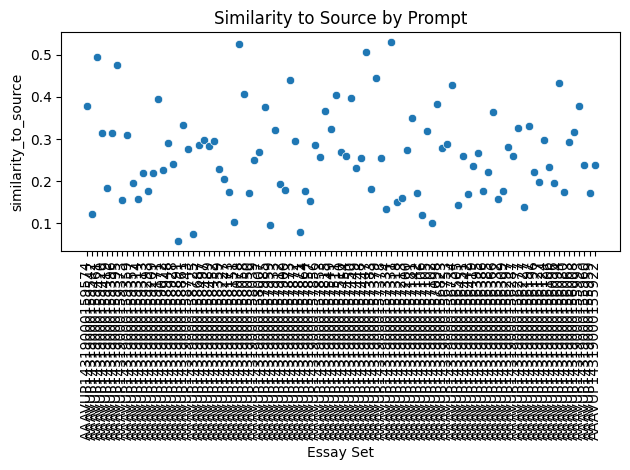

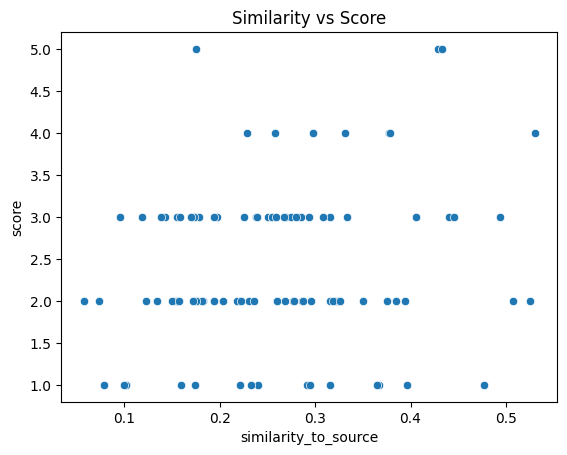

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df[:101], x="essay_id", y="similarity_to_source")
plt.title("Similarity to Source by Prompt")
plt.xlabel("Essay Set")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

sns.scatterplot(data=df[:101], x="similarity_to_source", y="score")
plt.title("Similarity vs Score")
plt.show()


Let's extract essay length (word count) and sentence count as additional features.

In [32]:
df['essay_length'] = df['full_text'].apply(lambda x: len(x.split()))
df['sentence_count'] = df['full_text'].apply(lambda x: len(nltk.sent_tokenize(x)))

display(df.head())

,essay_id,score,full_text,assignment,prompt_name,economically_disadvantaged,student_disability_status,ell_status,race_ethnicity,gender,source_text_1,cleaned_text,cleaned_source,similarity_to_source,essay_length,sentence_count
0,AAAVUP14319000159574,4,The author suggests that studying Venus is wor...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,Black/African American,F,"The Challenge of Exploring Venus\nVenus, somet...","[author, suggests, studying, venus, worthy, en...","[challenge, exploring, venus, venus, sometimes...",0.377823,396,17
1,AAAVUP14319000159542,2,NASA is fighting to be alble to to go to Venus...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Not economically disadvantaged,Not identified as having disability,No,Hispanic/Latino,F,"The Challenge of Exploring Venus\nVenus, somet...","[nasa, fighting, alble, go, venus, researching...","[challenge, exploring, venus, venus, sometimes...",0.122596,200,10
2,AAAVUP14319000159461,3,"""The Evening Star"", is one of the brightest po...","In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,White,M,"The Challenge of Exploring Venus\nVenus, somet...","[evening, star, one, brightest, point, light, ...","[challenge, exploring, venus, venus, sometimes...",0.494090,371,31
3,AAAVUP14319000159420,2,The author supports this idea because from rea...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Not identified as having disability,Yes,Hispanic/Latino,F,"The Challenge of Exploring Venus\nVenus, somet...","[author, support, idea, reading, passage, sugg...","[challenge, exploring, venus, venus, sometimes...",0.315162,224,10
4,AAAVUP14319000159419,2,How the author supports this idea is that he s...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Not identified as having disability,Yes,Hispanic/Latino,M,"The Challenge of Exploring Venus\nVenus, somet...","[author, support, idea, state, text, strivivng...","[challenge, exploring, venus, venus, sometimes...",0.182429,219,7


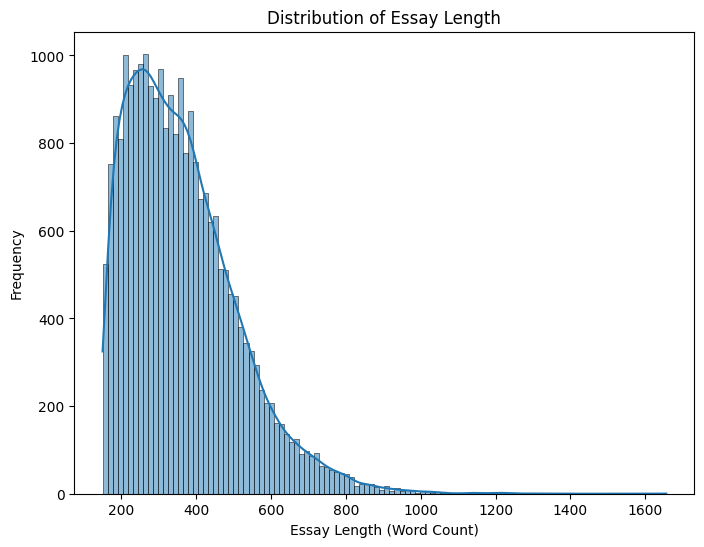

In [45]:
# Histogram for Essay Length
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='essay_length', kde=True)
plt.title('Distribution of Essay Length')
plt.xlabel('Essay Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

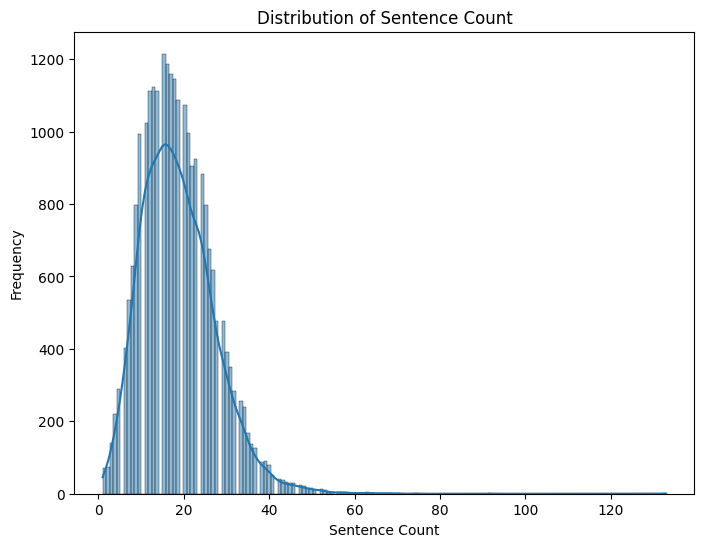

In [44]:
# Histogram for Sentence Count
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sentence_count', kde=True)
plt.title('Distribution of Sentence Count')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
def plot_wordcloud(text):
  from wordcloud import WordCloud
  comment_words = ''
  stopwords = list(nltk.corpus.stopwords.words("english"))
  for val in text:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 1200, height = 700, background_color = 'black', stopwords = stopwords, min_font_size = 10).generate(comment_words)

  plt.figure(figsize = (12, 7), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

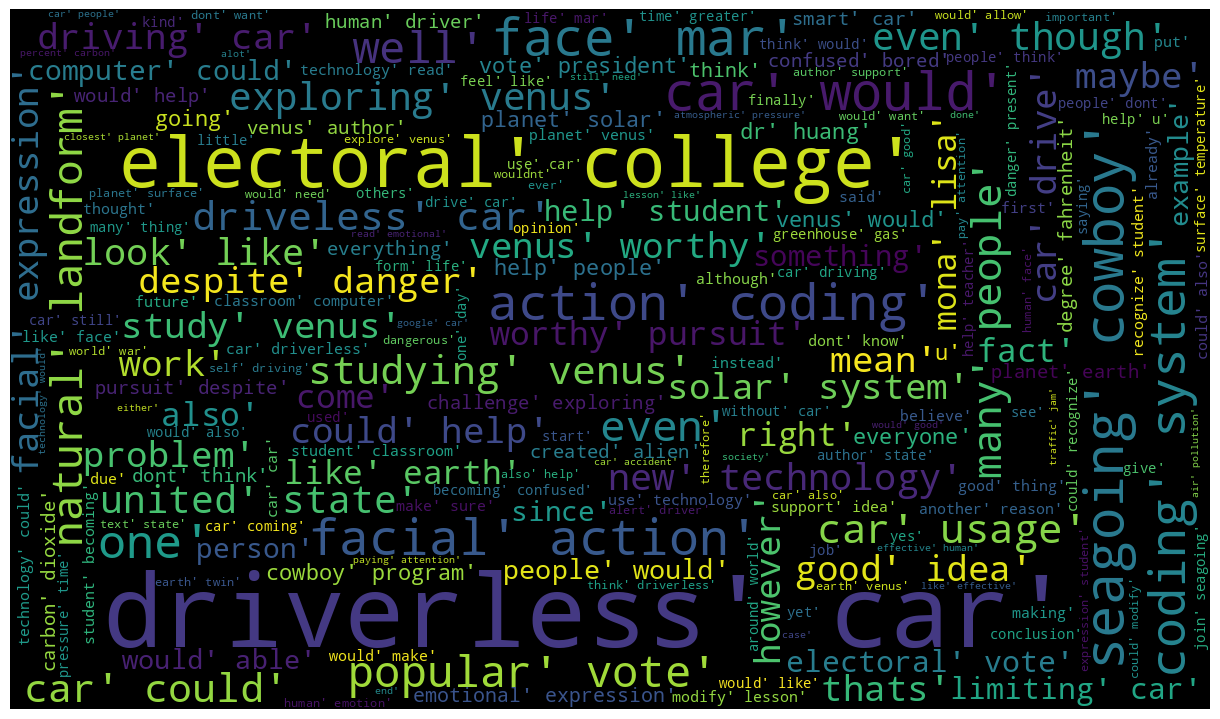

In [48]:
plot_wordcloud(df.cleaned_text)

# Model Training

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Join the list of tokens in 'cleaned_text' back into strings
text_as_strings = df['cleaned_text'].apply(lambda x: ' '.join(x))

# Join the list of tokens in 'cleaned_source' back into strings
source_as_strings = df['cleaned_source'].apply(lambda x: ' '.join(x))

CountVec = CountVectorizer(ngram_range=(1,1), max_features=1000, stop_words='english')
Count_data = CountVec.fit_transform(text_as_strings, source_as_strings)

In [51]:
X = Count_data.toarray()
y = df.score.values

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report

train_score = []
test_score = []
rmse_score = []
mae_score = []
rsquare_score = []

In [55]:
def evaluate_model(model):
  y_pred = model.predict(X_test)
  tr_score = model.score(X_train, y_train)
  ts_score = model.score(X_test, y_test)

  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  train_score.append(tr_score)
  test_score.append(ts_score)
  rmse_score.append(rmse)
  mae_score.append(mae)
  rsquare_score.append(r2)

  print("Root Mean Square Error (RMSE) : ", rmse)
  print("Mean Absolute Error (MAE) : ", mae)
  print("R2 Score (R2) : ", r2)

  plt.figure(figsize=(15,5))
  sns.lineplot(x=range(len(y_test[:100])), y=y_test[:100], label="Original Grade")
  sns.lineplot(x=range(len(y_test[:100])), y=y_pred[:100], label="Predicted Grade")
  plt.title(f"Actual vs Predicted Grade ({type(model).__name__})")
  plt.xlabel("Index")
  plt.ylabel("Score")
  plt.legend()
  plt.show()

Root Mean Square Error (RMSE) :  0.6490241303747387
Mean Absolute Error (MAE) :  0.5036308487944817
R2 Score (R2) :  0.6045469323752143


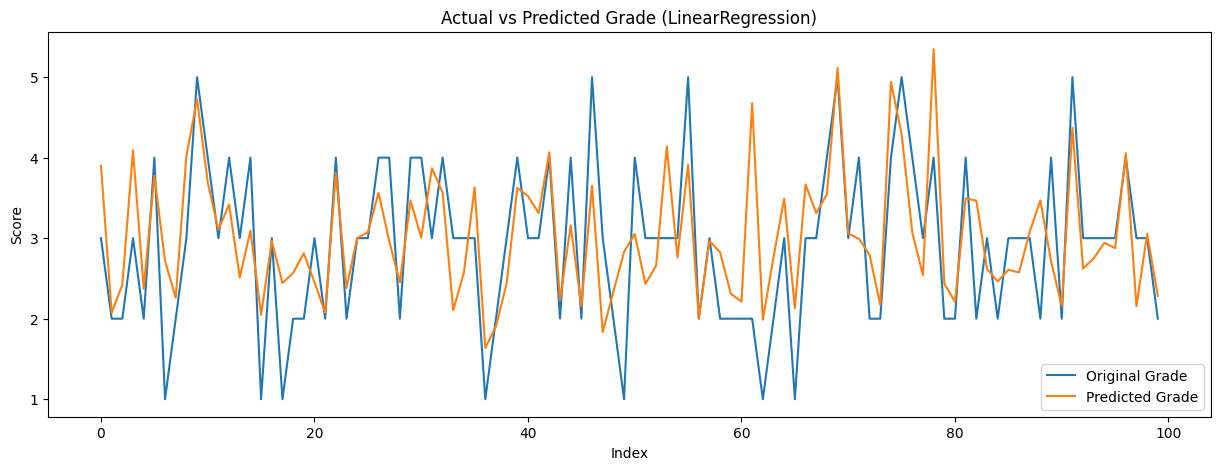

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model(lr)

Root Mean Square Error (RMSE) :  0.6489869140244005
Mean Absolute Error (MAE) :  0.5036035345284317
R2 Score (R2) :  0.6045922832250763


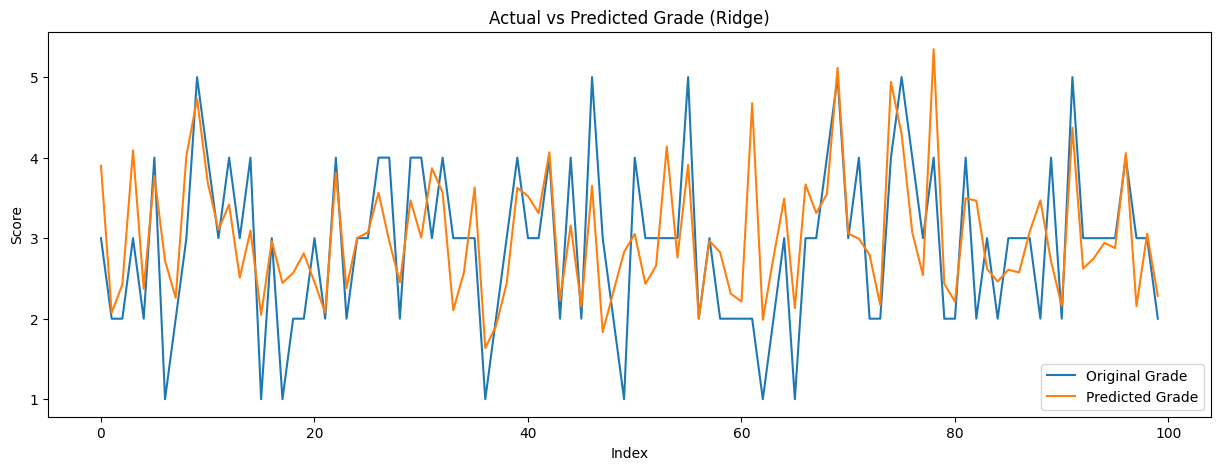

In [57]:
ridge = Ridge()
ridge.fit(X_train, y_train)
evaluate_model(ridge)

Root Mean Square Error (RMSE) :  1.0536555663819802
Mean Absolute Error (MAE) :  0.7426202992317024
R2 Score (R2) :  -0.04224685335003353


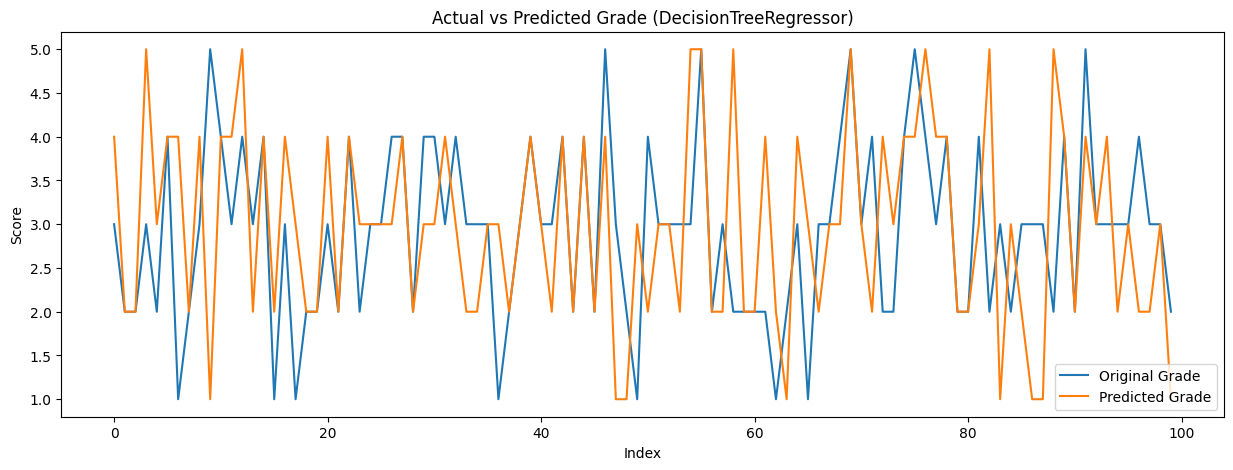

In [58]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
evaluate_model(dtr)

Root Mean Square Error (RMSE) :  0.7724271826698583
Mean Absolute Error (MAE) :  0.48989082086534574
R2 Score (R2) :  0.43987061296012586


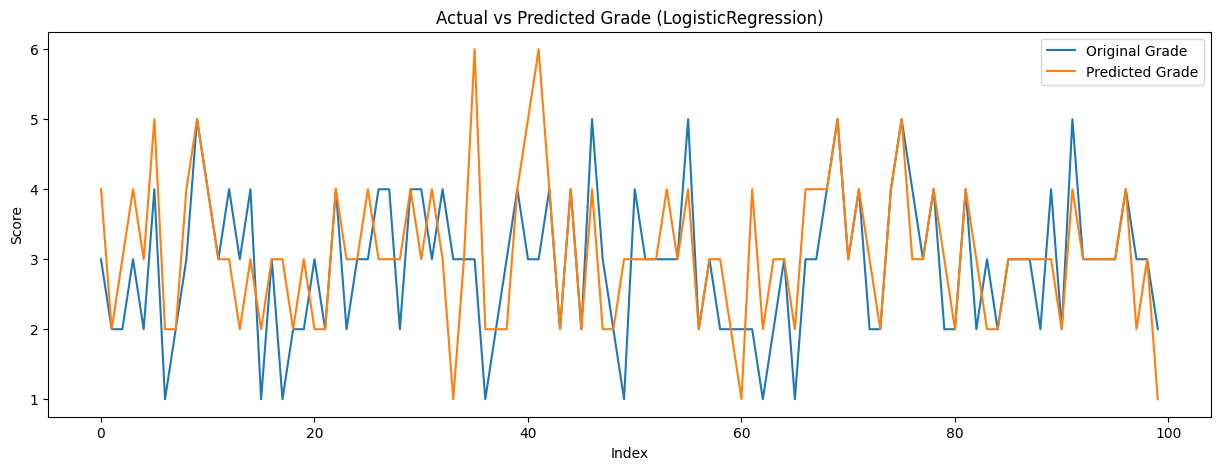

In [66]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
evaluate_model(logr)

Root Mean Square Error (RMSE) :  0.7784241757108887
Mean Absolute Error (MAE) :  0.5153659522846745
R2 Score (R2) :  0.4311393517592331


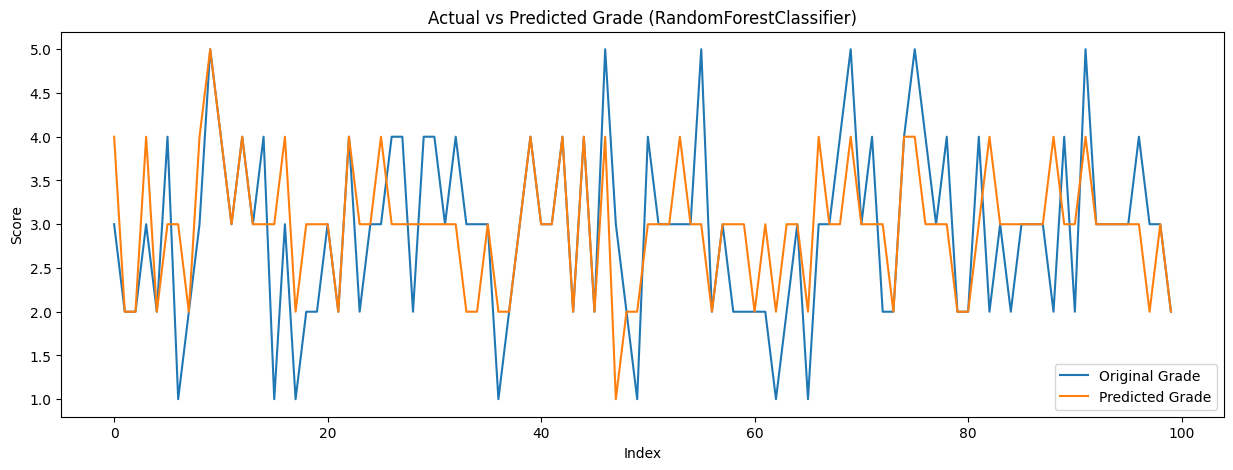

In [60]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
evaluate_model(rfc)

Root Mean Square Error (RMSE) :  0.7059475942356924
Mean Absolute Error (MAE) :  0.5619374578784202
R2 Score (R2) :  0.532137555024583


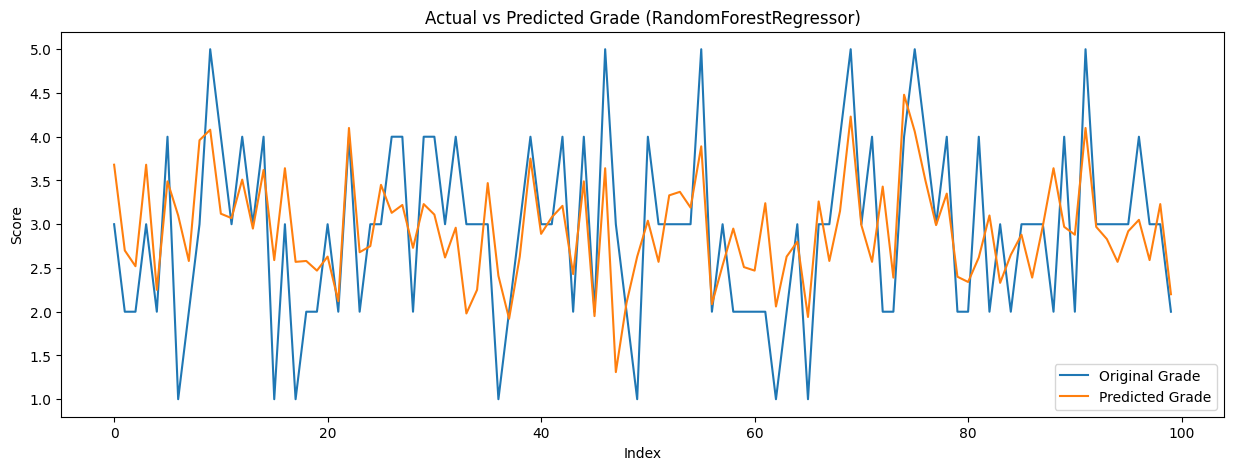

In [61]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
evaluate_model(rfr)

In [62]:
pd.DataFrame({"Model": ["Linear Regression", "Ridge", "Decision Tree Regressor", "Logistic Regression", "Random Forest Classifier", "Random Forest Regressor"], "Training Score": train_score, "Testing Score": test_score, "R2 Score": rsquare_score, "RMSE": rmse_score, "MAE": mae_score})

,Model,Training Score,Testing Score,R2 Score,RMSE,MAE
0,Linear Regression,0.661903,0.604547,0.604547,0.649024,0.503631
1,Ridge,0.661903,0.604592,0.604592,0.648987,0.503604
2,Decision Tree Regressor,0.999976,-0.042247,-0.042247,1.053656,0.742620
3,Logistic Regression,0.663027,0.558835,0.439871,0.772427,0.489891
4,Random Forest Classifier,0.999949,0.528508,0.431139,0.778424,0.515366
5,Random Forest Regressor,0.934083,0.532138,0.532138,0.705948,0.561937


In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [64]:
def cm(model):
    y_pred=model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    print(model)
    plt.show()

In [85]:
from sklearn.metrics import classification_report

y_pred_logr = logr.predict(X_test)
print(classification_report(y_test, y_pred_logr))

              precision    recall  f1-score   support

           1       0.47      0.33      0.39       428
           2       0.63      0.67      0.65      1775
           3       0.57      0.62      0.60      2196
           4       0.56      0.52      0.54      1380
           5       0.47      0.38      0.42       349
           6       0.25      0.22      0.24        54

    accuracy                           0.58      6182
   macro avg       0.49      0.46      0.47      6182
weighted avg       0.57      0.58      0.57      6182



LogisticRegression()


<Figure size 800x600 with 0 Axes>

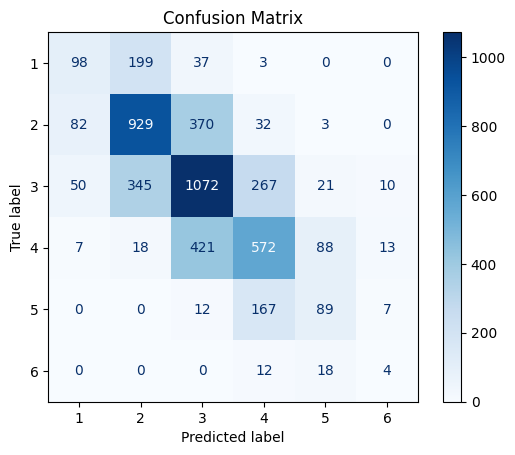

In [67]:
cm(logr)

RandomForestClassifier()


<Figure size 800x600 with 0 Axes>

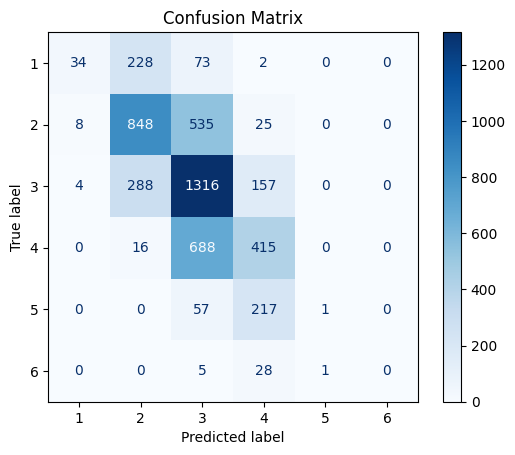

In [68]:
cm(rfc)

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Re-split your data just in case
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)

In [77]:
print("Before SMOTE:")
print(pd.Series(y_train).value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Before SMOTE:
3    6825
2    5072
4    4173
1    1323
5    1007
6     146
Name: count, dtype: int64

After SMOTE:
4    9021
2    9021
3    9021
1    9021
5    9021
6    9021
Name: count, dtype: int64


Root Mean Square Error (RMSE) :  0.8660113920762872
Mean Absolute Error (MAE) :  0.6665649683662285
R2 Score (R2) :  0.31050508294141954


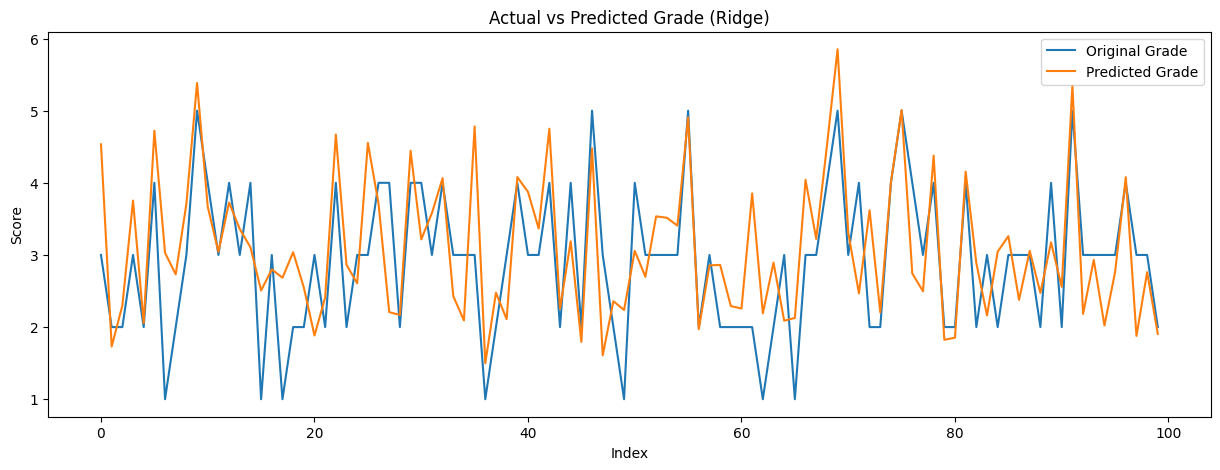

In [71]:
ridge_smote = Ridge()
ridge_smote.fit(X_train_smote, y_train_smote)
evaluate_model(ridge_smote)

Root Mean Square Error (RMSE) :  0.7996480947142536
Mean Absolute Error (MAE) :  0.48285344548689746
R2 Score (R2) :  0.41212949311774427


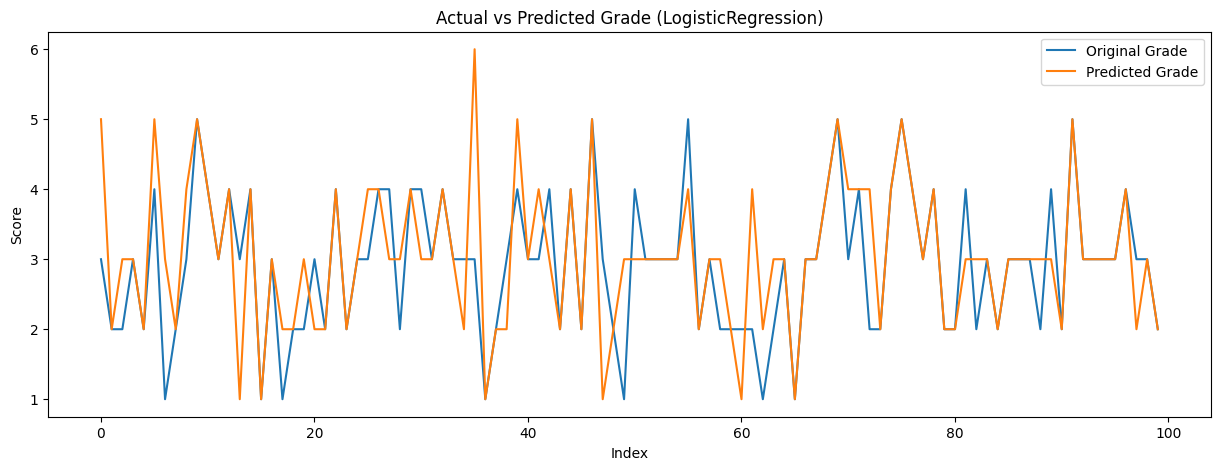

In [78]:
logr_smote = LogisticRegression()
logr_smote.fit(X_train_smote, y_train_smote)
evaluate_model(logr_smote)

Confusion Matrix After SMOTE

LogisticRegression()


<Figure size 800x600 with 0 Axes>

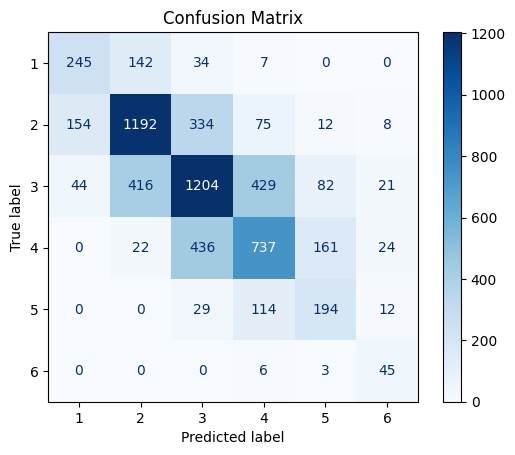

In [79]:
cm(logr_smote)

In [80]:
from sklearn.metrics import classification_report

y_pred_logr_smote = logr_smote.predict(X_test)
print(classification_report(y_test, y_pred_logr_smote))

              precision    recall  f1-score   support

           1       0.55      0.57      0.56       428
           2       0.67      0.67      0.67      1775
           3       0.59      0.55      0.57      2196
           4       0.54      0.53      0.54      1380
           5       0.43      0.56      0.48       349
           6       0.41      0.83      0.55        54

    accuracy                           0.59      6182
   macro avg       0.53      0.62      0.56      6182
weighted avg       0.59      0.59      0.59      6182




Evaluating Ridge model with alpha = 0.01
Root Mean Square Error (RMSE) :  0.6530927972153795
Mean Absolute Error (MAE) :  0.5063550039977363
R2 Score (R2) :  0.6078667697384201


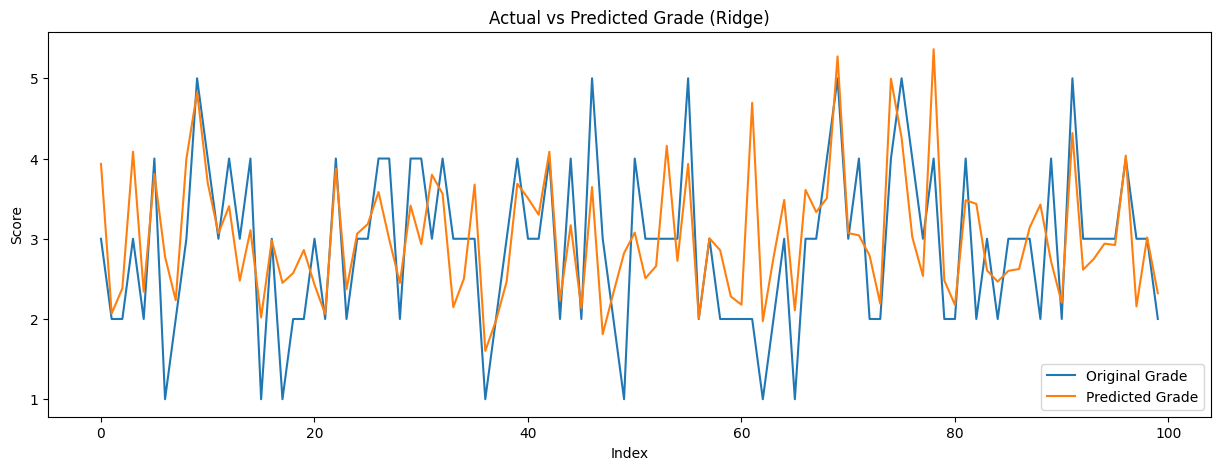


Evaluating Ridge model with alpha = 0.1
Root Mean Square Error (RMSE) :  0.6530883212450854
Mean Absolute Error (MAE) :  0.5063517220390138
R2 Score (R2) :  0.6078721446887575


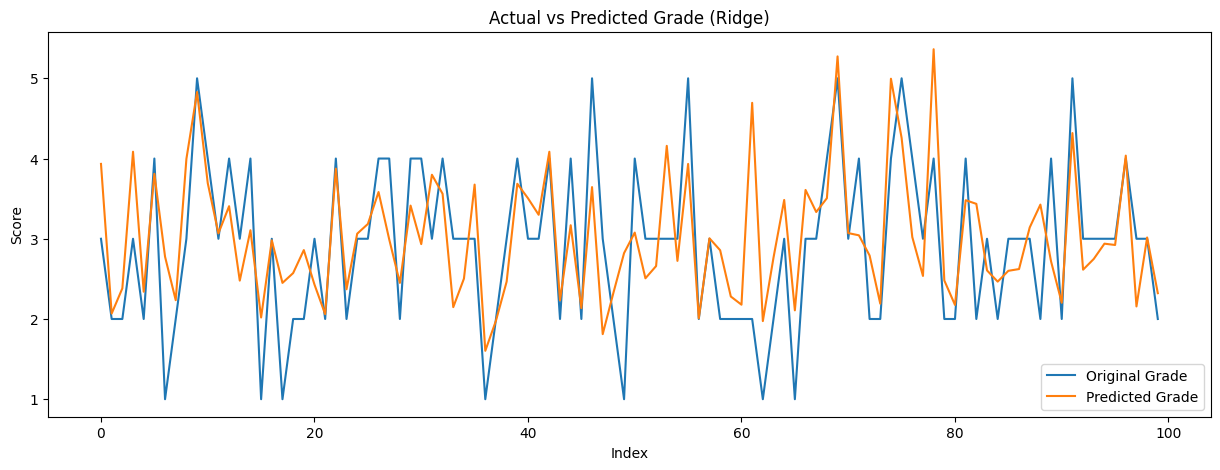


Evaluating Ridge model with alpha = 1.0
Root Mean Square Error (RMSE) :  0.6530437371133506
Mean Absolute Error (MAE) :  0.5063190287100939
R2 Score (R2) :  0.6079256813472695


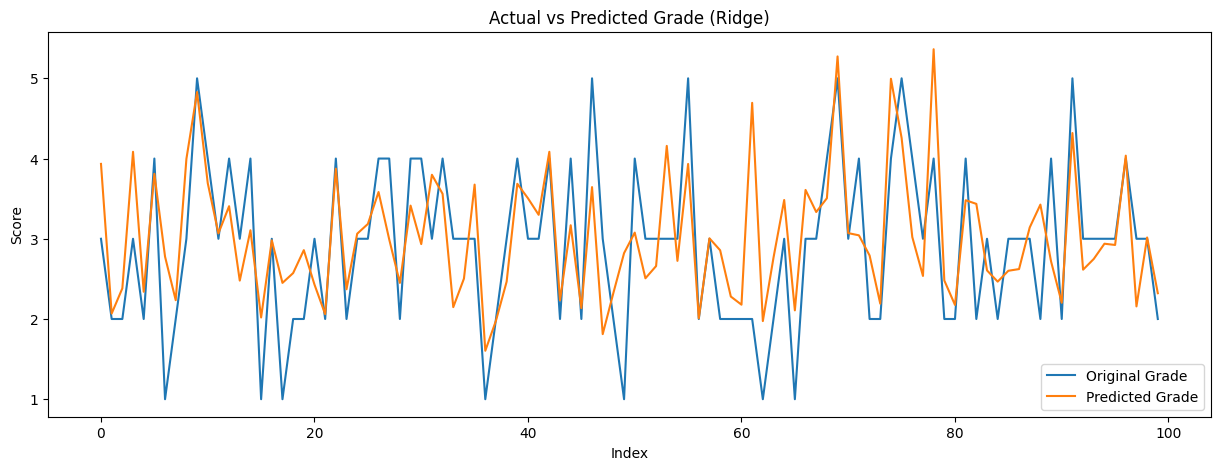


Evaluating Ridge model with alpha = 10.0
Root Mean Square Error (RMSE) :  0.6526144629466117
Mean Absolute Error (MAE) :  0.5060071275907018
R2 Score (R2) :  0.6084409670746509


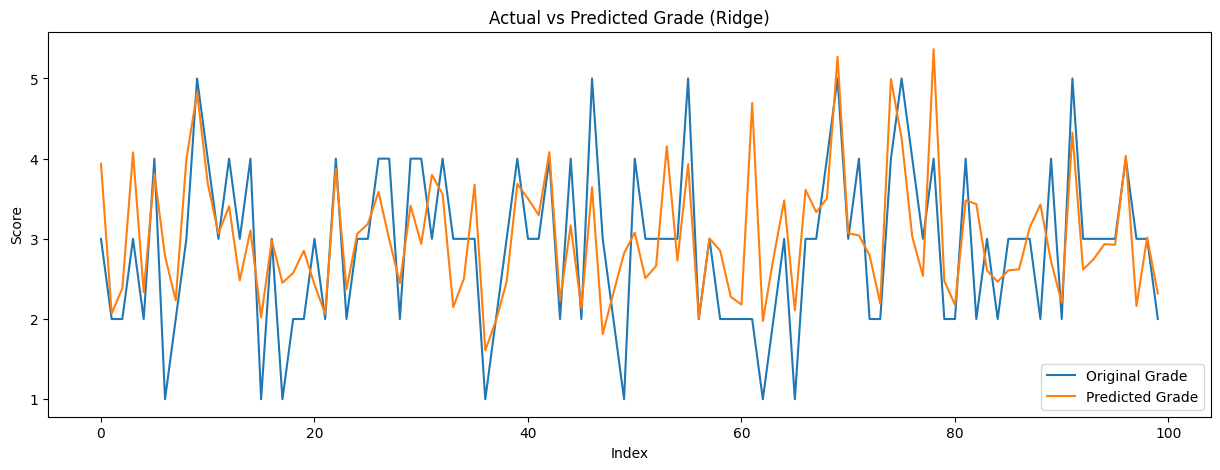


Evaluating Ridge model with alpha = 100.0
Root Mean Square Error (RMSE) :  0.6494360159858821
Mean Absolute Error (MAE) :  0.5037294340804711
R2 Score (R2) :  0.6122457216602881


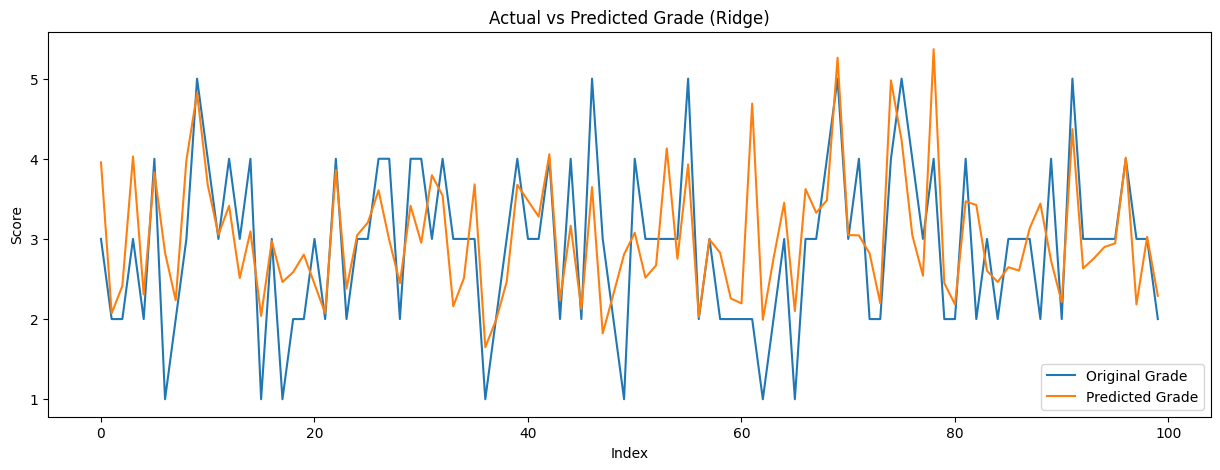


Evaluating Ridge model with alpha = 1000.0
Root Mean Square Error (RMSE) :  0.6431490524863621
Mean Absolute Error (MAE) :  0.5001081202872225
R2 Score (R2) :  0.6197168110482414


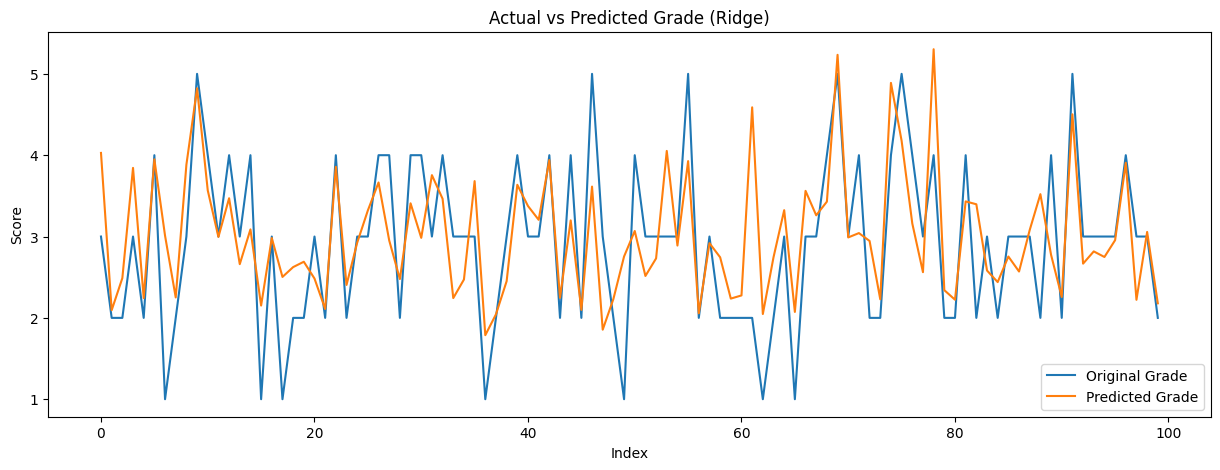

In [81]:
alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

for alpha in alpha_values:
  print(f"\nEvaluating Ridge model with alpha = {alpha}")
  ridge_tuned = Ridge(alpha=alpha)
  ridge_tuned.fit(X_train, y_train)
  evaluate_model(ridge_tuned)

Root Mean Square Error (RMSE) :  0.6431490524863621
Mean Absolute Error (MAE) :  0.5001081202872225
R2 Score (R2) :  0.6197168110482414


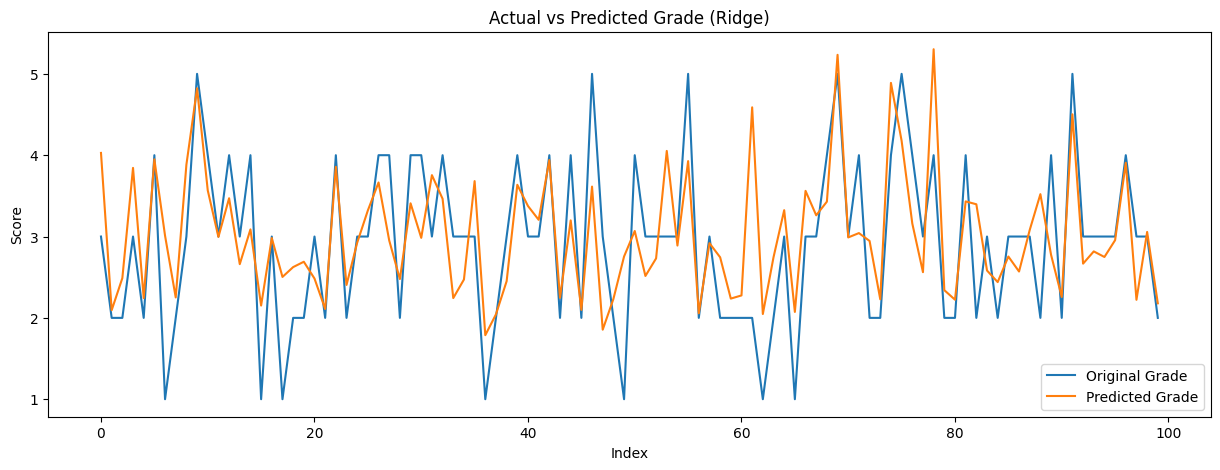

In [82]:
ridge_alpha = Ridge(alpha=1000.0)
ridge_alpha.fit(X_train, y_train)
# y_predict = ridge_alpha.predict(X_test)
evaluate_model(ridge_alpha)

## Saving the Model

In [84]:
import pickle

with open('ridge_alpha.pkl', 'wb') as file:
  pickle.dump(ridge_alpha, file)

with open('vect.pkl', 'wb') as file:
  pickle.dump(CountVec, file)

with open('logr.pkl', 'wb') as file:
  pickle.dump(logr, file)

with open('logr_smote.pkl', 'wb') as file:
  pickle.dump(logr, file)